In [1]:
!pip install ultralytics --quiet

import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
# Load YOLOv8n (small and fast). You can also use 'yolov8s.pt' / 'yolov8m.pt' etc.
model = YOLO("yolov8n.pt")

# Check the class index for 'car'
print(model.names)
print("Index of 'car':", [k for k, v in model.names.items() if v == 'car'])


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [3]:
CAR_CLASS_ID = [k for k, v in model.names.items() if v == 'car'][0]
print("Using CAR_CLASS_ID =", CAR_CLASS_ID)


Using CAR_CLASS_ID = 2


In [5]:
IMAGE_DIR = "/content/drive/MyDrive/through yolo object counting/train/images"   # change if needed

# List images
supported_ext = (".jpg", ".jpeg", ".png")
image_paths = [
    os.path.join(IMAGE_DIR, f)
    for f in os.listdir(IMAGE_DIR)
    if f.lower().endswith(supported_ext)
]

print(f"Found {len(image_paths)} images:")
for p in image_paths[:5]:
    print(" -", p)


Found 878 images:
 - /content/drive/MyDrive/through yolo object counting/train/images/0777838554ecb1eb_jpg.rf.iPYXq2VyMllb4wmHbOmx.jpg
 - /content/drive/MyDrive/through yolo object counting/train/images/0b35c604f8a87bd0_jpg.rf.KMe69WjuxHI5xqZLXJfu.jpg
 - /content/drive/MyDrive/through yolo object counting/train/images/0a03d85b3dcb2a1b_jpg.rf.a00ac9c0b1e0178bd393f049593c73c6.jpg
 - /content/drive/MyDrive/through yolo object counting/train/images/089cc41a901b2653_jpg.rf.6743a24c01af44063b9c1968d6402f52.jpg
 - /content/drive/MyDrive/through yolo object counting/train/images/0777838554ecb1eb_jpg.rf.9e11b73a1dae5675124c22e13f73f1f5.jpg


In [6]:
def detect_and_count_cars(image_path, model, car_class_id=CAR_CLASS_ID, conf_threshold=0.25):
    # Run YOLO inference
    results = model(image_path, conf=conf_threshold, verbose=False)[0]

    # Read image with OpenCV (for drawing)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    car_count = 0

    # results.boxes holds detections
    for box in results.boxes:
        cls_id = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        x1, y1, x2, y2 = box.xyxy[0].tolist()

        if cls_id == car_class_id:
            car_count += 1

            # Draw bounding box for car
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f"car {conf:.2f}"
            cv2.putText(
                img,
                label,
                (x1, max(y1 - 5, 0)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                2
            )

    return car_count, img


Testing on: /content/drive/MyDrive/through yolo object counting/train/images/0777838554ecb1eb_jpg.rf.iPYXq2VyMllb4wmHbOmx.jpg
Detected cars: 7


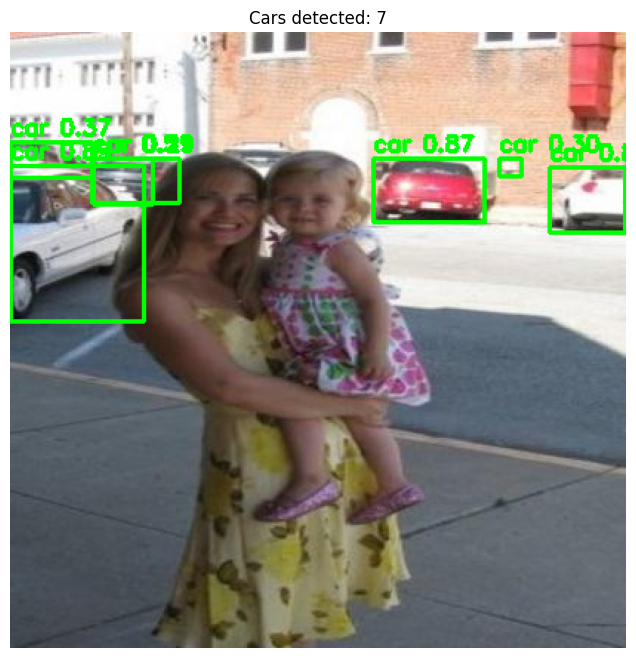

In [7]:
test_image = image_paths[0]  # change index if needed
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, model)

print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()


In [8]:
results_summary = []

for img_path in image_paths:
    car_count, annotated_img = detect_and_count_cars(img_path, model)
    results_summary.append({
        "image": os.path.basename(img_path),
        "path": img_path,
        "car_count": car_count
    })
    print(f"{os.path.basename(img_path)} -> {car_count} cars")


0777838554ecb1eb_jpg.rf.iPYXq2VyMllb4wmHbOmx.jpg -> 7 cars
0b35c604f8a87bd0_jpg.rf.KMe69WjuxHI5xqZLXJfu.jpg -> 0 cars
0a03d85b3dcb2a1b_jpg.rf.a00ac9c0b1e0178bd393f049593c73c6.jpg -> 1 cars
089cc41a901b2653_jpg.rf.6743a24c01af44063b9c1968d6402f52.jpg -> 4 cars
0777838554ecb1eb_jpg.rf.9e11b73a1dae5675124c22e13f73f1f5.jpg -> 7 cars
067e7d6c015a431d_jpg.rf.76bce3c01ba4c9d60c0e94b3c01bdca4.jpg -> 0 cars
0a56ee41a72480bc_jpg.rf.k0G8JC1qya6UiWGHtQK3.jpg -> 0 cars
08ebb1106c5f4799_jpg.rf.7ce43293a263c07c84a9c894f5caba87.jpg -> 1 cars
0158307c4ad94b38_jpg.rf.7c3ac0278eaf3a1773359994c4679aca.jpg -> 0 cars
041e674d0d9a45ec_jpg.rf.LMTUDjIPeUHgU4b68RVZ.jpg -> 0 cars
040d25a99e7b675b_jpg.rf.e1b3ced8dbbc7905d4fe5ac30622a419.jpg -> 0 cars
031a836081712b50_jpg.rf.wZjpl3ylNPHAO9WnRAWH.jpg -> 6 cars
08ebb1106c5f4799_jpg.rf.NhEpevpClnnaJ1dYEL76.jpg -> 1 cars
0b35c604f8a87bd0_jpg.rf.0771220380bd5aa3d252ce58471bf2c7.jpg -> 0 cars
0c5138e15c71f741_jpg.rf.f1dddbc942fd2fa7fac0faefabf3486d.jpg -> 0 cars
02d437a

Testing on: /content/drive/MyDrive/through yolo object counting/train/images/089cc41a901b2653_jpg.rf.6743a24c01af44063b9c1968d6402f52.jpg
Detected cars: 4


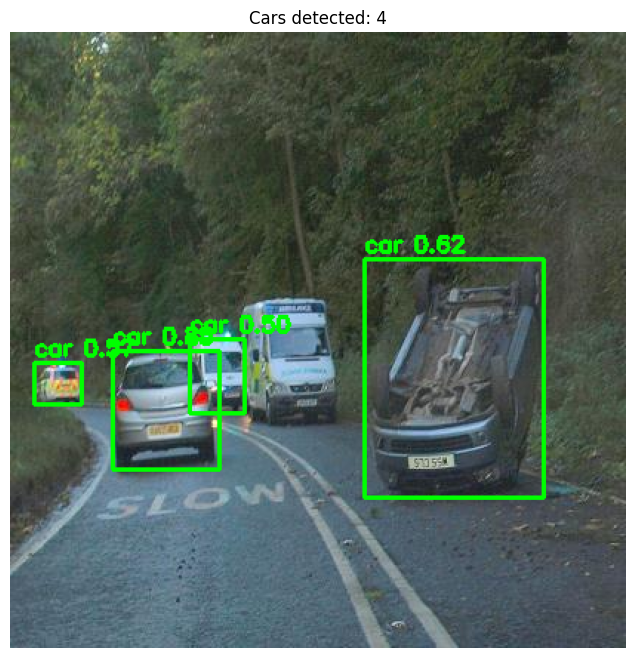

In [9]:
test_image = image_paths[3]  # change index if needed
print("Testing on:", test_image)

car_count, annotated_img = detect_and_count_cars(test_image, model)

print(f"Detected cars: {car_count}")

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title(f"Cars detected: {car_count}")
plt.show()